Imagine a simple ideal circuit with a controlled current source connected in parallel to a resistor.  
Now consider the following problem:
 * Input: current setpoint at source
 * Output: voltage across resistor
 
__Question:__ can we infer the resistance ($R=100\Omega$) by collecting corrupted voltage readings?

![](circuit_simple.png "Simple V=IR circuit")

# Generate corrupted voltage readings

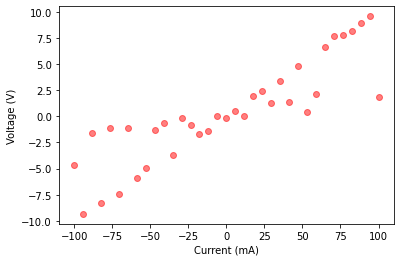

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from sklearn.linear_model import HuberRegressor

N_samples, N_corrupt = 35, 15

# Generate clean data
R = 100 # ohms
I = np.linspace(-100, 100, N_samples) # milli-amps
V = I/1000 * R # volts

# Add measurement noise
noise = 0.2 * np.random.randn(*V.shape)
V = V + noise

# Corrupt some of the data
idx = range(len(V))
idx = sample(idx, N_corrupt)
V[idx] *= np.random.rand(len(idx)) / 2

# Plot noisy data
plt.plot(I, V, 'ro', alpha=0.5, label='Noisy Data')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.show()

# Perform L2-based regression

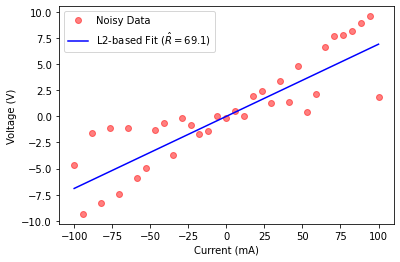

In [2]:
H = I.reshape(-1,1)/1000
theta_L2, *_ = np.linalg.lstsq(H, V, rcond=None)

# Evaluate model over all I values
Vhat_L2 = H @ theta_L2

# Visualize estimate
R_L2 = np.round(theta_L2[0], 1)
plt.plot(I, V, 'ro', alpha=0.5, label='Noisy Data')
plt.plot(I, Vhat_L2, 'b', label=f'L2-based Fit ($\hat{{R}}={R_L2}$)')
plt.legend(loc='best')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.show()

# Perform Huber-based regression

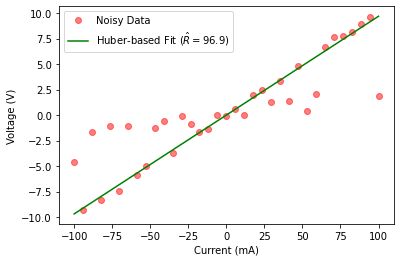

In [3]:
def Huber_fit(x, y):
    x_, y_ = x.reshape(-1,1), y
    huber = HuberRegressor(epsilon=1.0).fit(x_, y_)
    coef_ = huber.coef_
    return coef_

# Obtain estimate
theta_L1 = Huber_fit(I/1000, V)

# Evaluate model over all I values
Vhat_L1 = H @ theta_L1

# Visualize estimate
R_L1 = np.round(theta_L1[0], 1)
plt.plot(I, V, 'ro', alpha=0.5, label='Noisy Data')
plt.plot(I, Vhat_L1, 'g', label=f'Huber-based Fit ($\hat{{R}} = {R_L1}$)')
plt.legend(loc='best')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.show()

# CHALLENGE TO STUDENT

Construct a similar example, but not with circuits, where you'd want to perform regression on a corrupted dataset. Select a real-world example.